# Plot accumulated pollution results

In [4]:
import numpy as np
import pandas as pd

from src.tools.plotter import init_plots, store_sns
import seaborn as sns

from src.trace_set.database import Database
from src.trace_set.pollution import PollutionType

init_plots()

In [39]:
xlabels = {
    PollutionType.gauss: "Gaussian noise parameter",
    PollutionType.jitter: "Clock jitter parameter",
    PollutionType.delay: "Random delay parameter"
}

titles = {
    Database.ascad: {
        PollutionType.gauss: "ASCAD (Masked, Gaussian noise)\nPerformance on 300.000 traces"
    },
    Database.ascad_none: {
        PollutionType.gauss: "ASCAD (Unprotected, Gaussian noise)\nPerformance on 30.000 traces",
        PollutionType.jitter: "ASCAD (Unprotected, Clock jitter)",
        PollutionType.delay: "ASCAD (Unprotected, Random delay)"
    },
    Database.aisy: {
        PollutionType.gauss: "AISy LA traces (Unprotected, Gaussian noise)\nPerformance on 2.500 traces",
        PollutionType.jitter: "AISy LA traces (Unprotected, Clock jitter)\nPerformance on 2.500 traces",
        PollutionType.delay: "AISy LA traces (Unprotected, Random delay)\nPerformance on 2.500 traces"
    }
}

methods = {
    "dlla9": "DL-LA 9 class",
    "dlla2": "Wegener DL-LA",
    "cri_tvla_1": "CRI TVLA $\mu_1$",
    "cri_tvla_2": "CRI TVLA $\mu_2$",
}

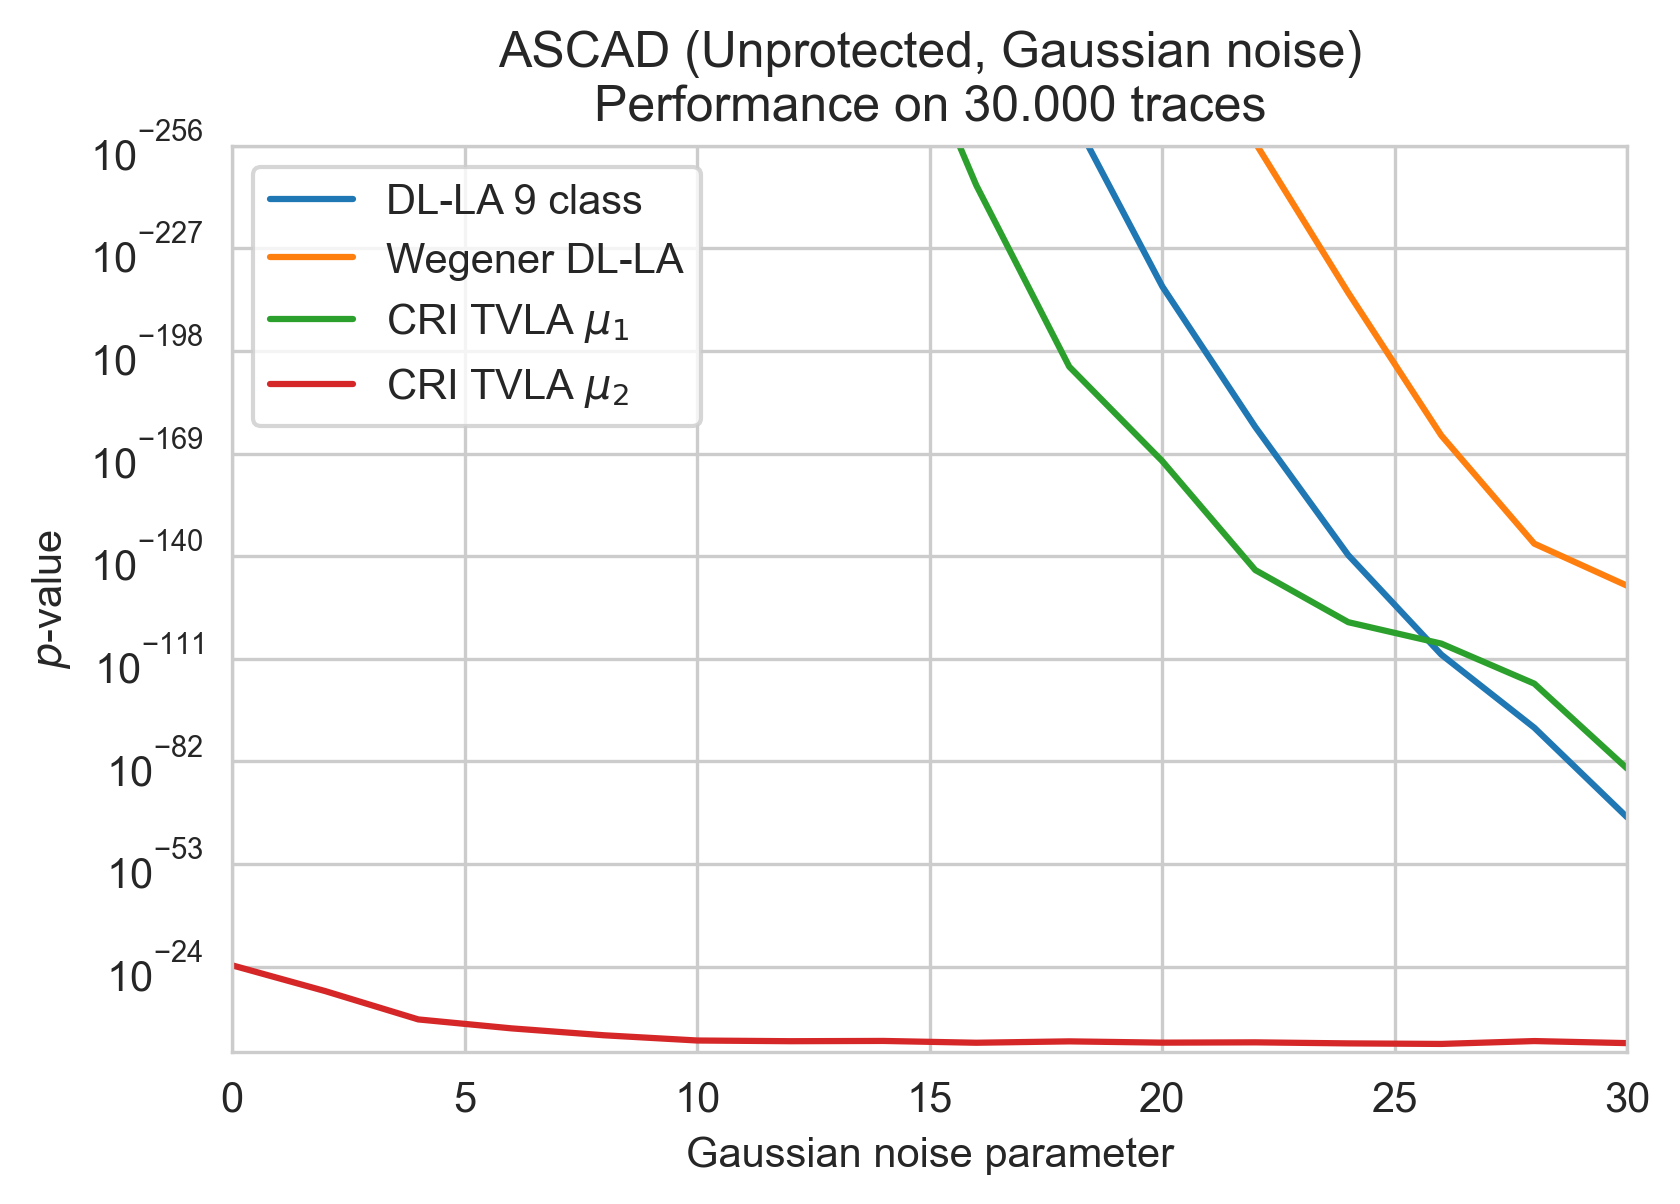

In [40]:
def plot(db: Database, pollution: PollutionType, ylim=(1, 10 ** -256), xlim=(0, 16), num_traces: str = None):
    suffix = ""
    if num_traces is not None:
        suffix = f"_{num_traces}"
    file_name = f"results_{db.name}{suffix}.csv"

    df = pd.read_csv(file_name, sep=";")
    df = df[df.pollution == pollution.name].drop(columns=[df.pollution.name])

    gdf = df.groupby(df.method)
    g = None
    for method, label in methods.items():
        if method in gdf.groups:
            method_group = gdf.get_group(method)
            med = method_group.groupby(df.param).mean()

            g = sns.lineplot(x=med.param, y=med.p, label=label)

    g.invert_yaxis()
    g.set(yscale="log",
          ylim=ylim,
          xlim=xlim,
          xlabel=xlabels[pollution],
          ylabel="$p$-value",
          title=titles[db][pollution])
    store_sns(g, f"pollution-results-{db.name}-{pollution.name}")

plot(Database.ascad_none, PollutionType.gauss, xlim=(0, 30), num_traces="30k")

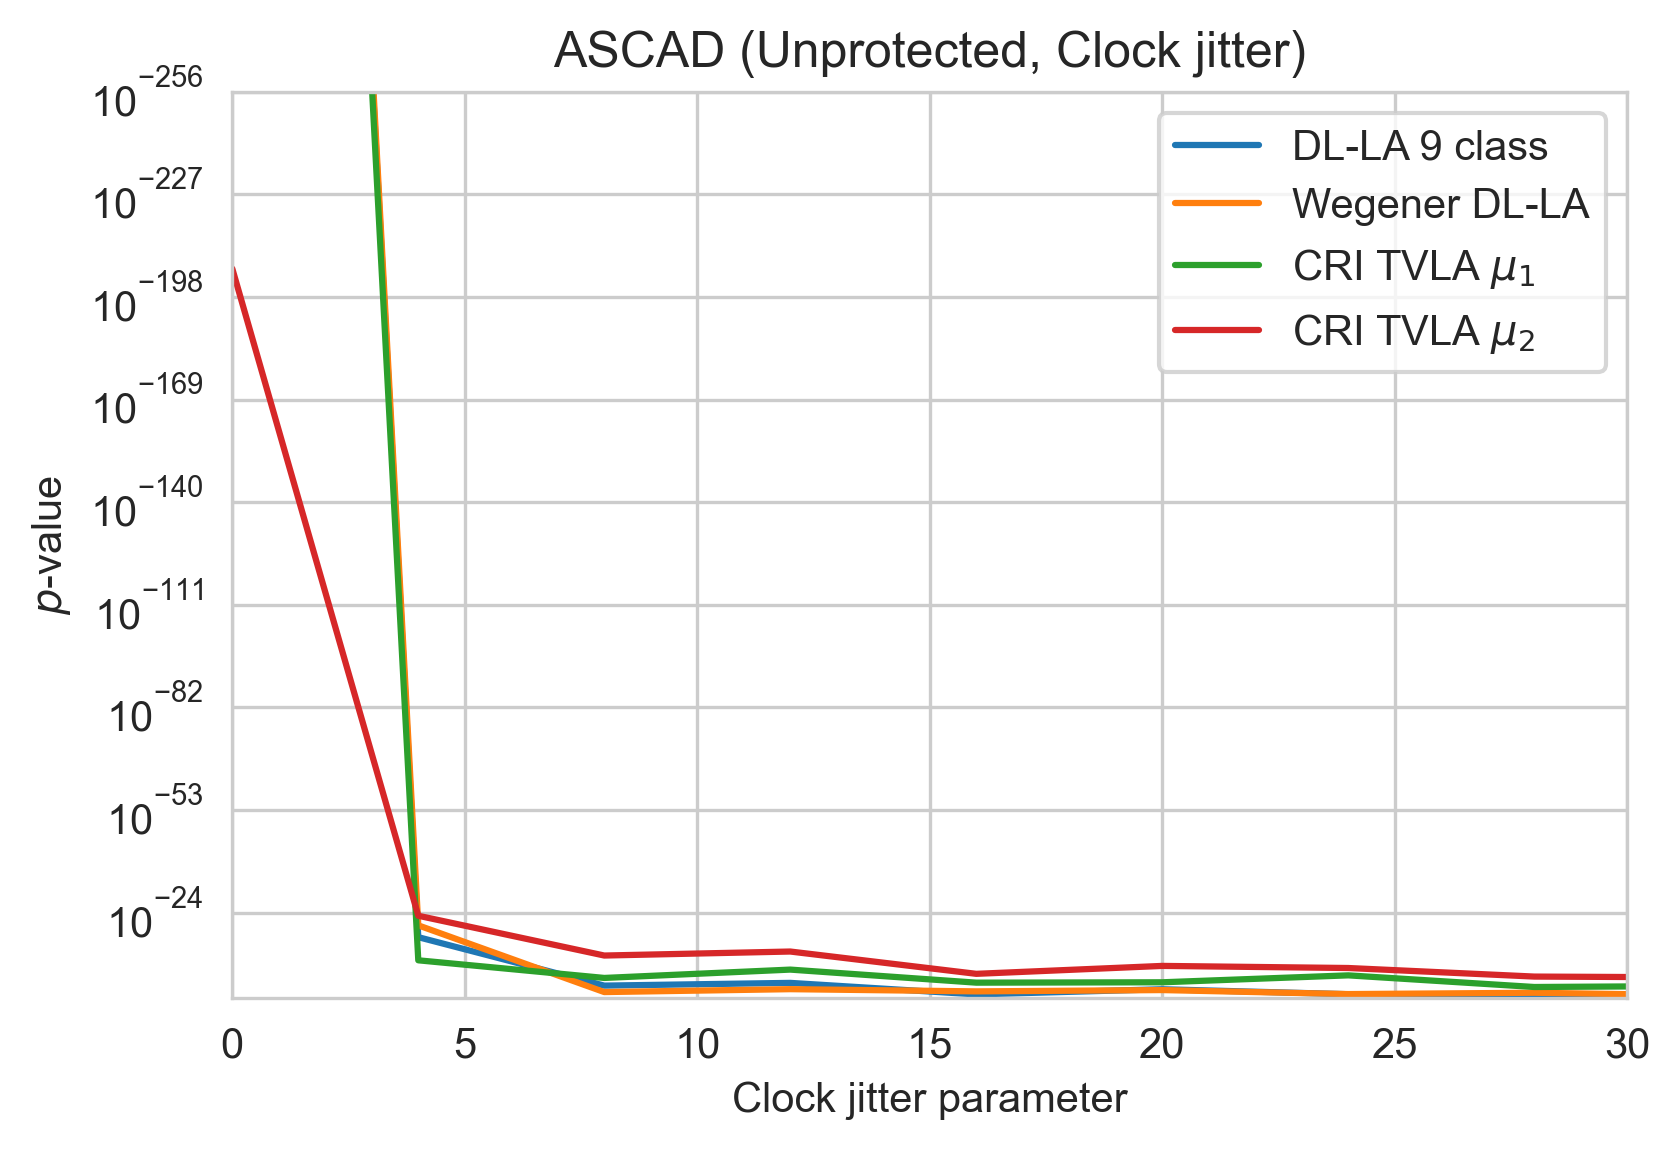

In [41]:
plot(Database.ascad_none, PollutionType.jitter, xlim=(0, 30))

In [ ]:
plot(Database.aisy, PollutionType.jitter, xlim=(0, 30))

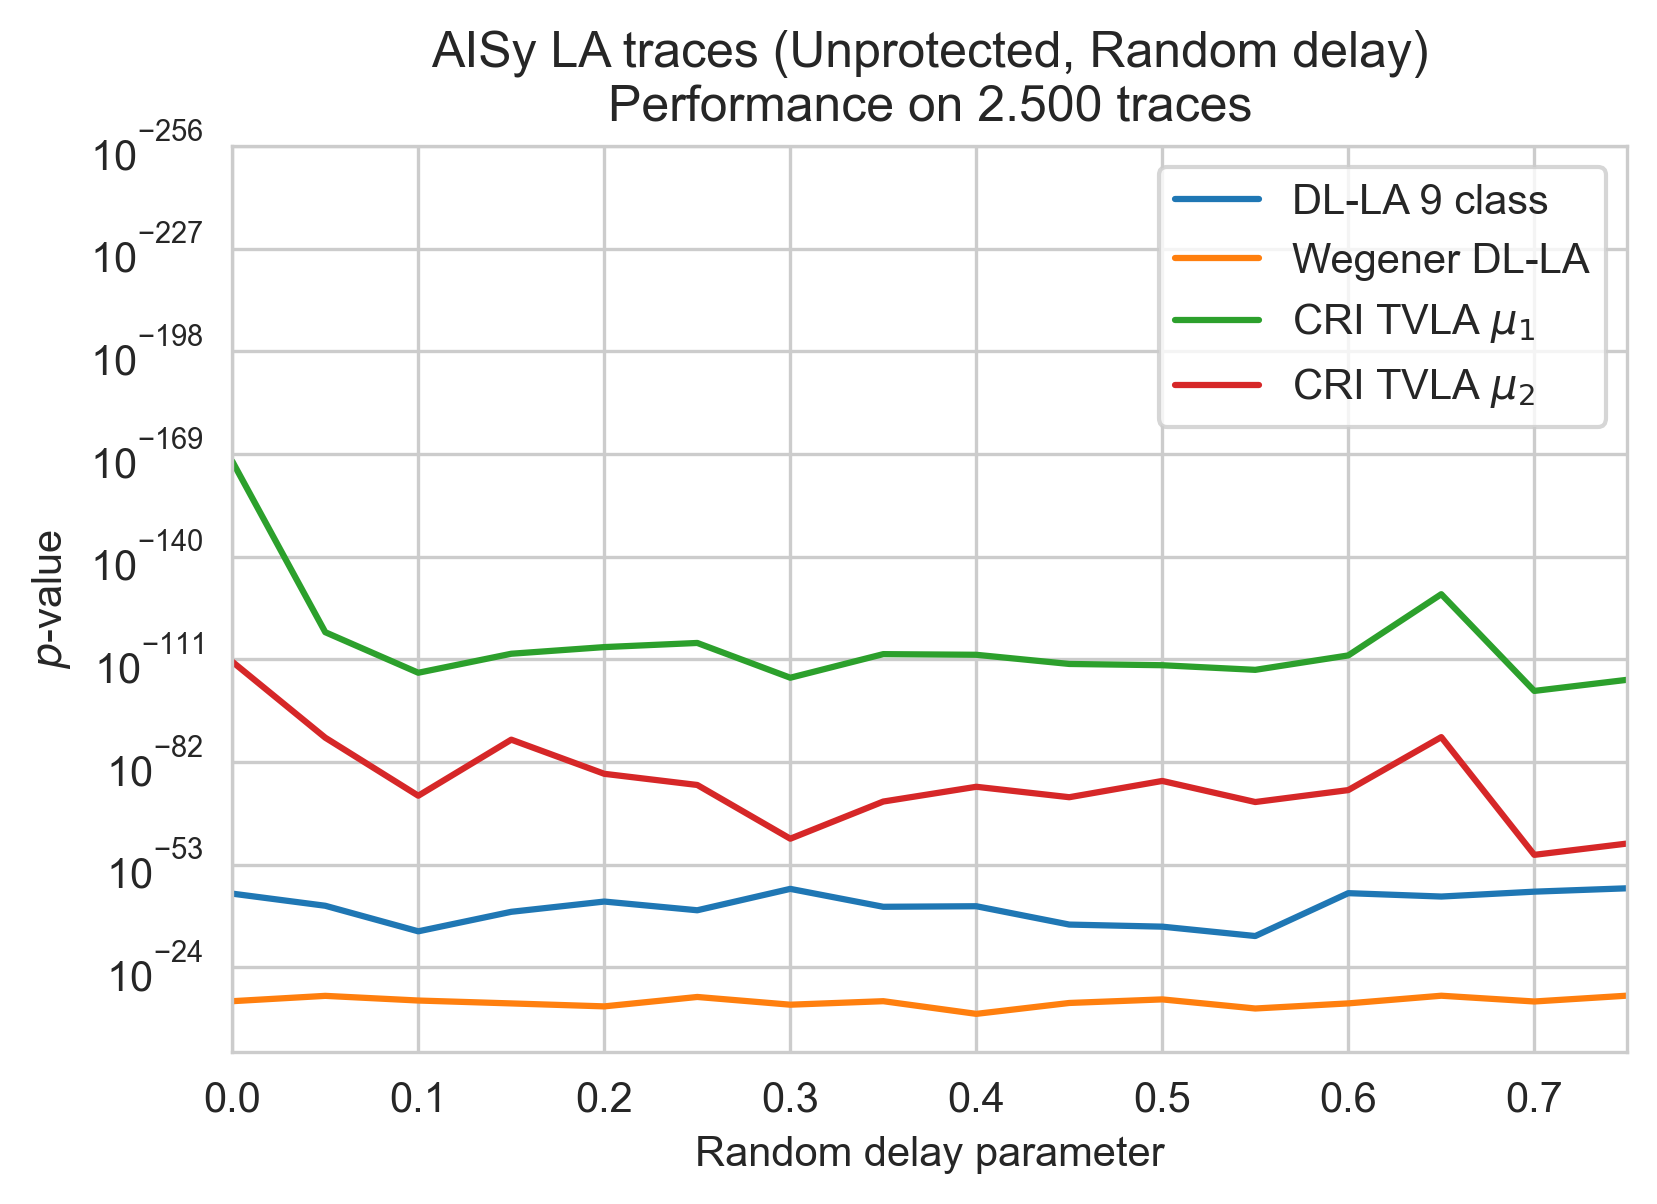

In [27]:
plot(Database.aisy, PollutionType.delay, xlim=(0, .75))

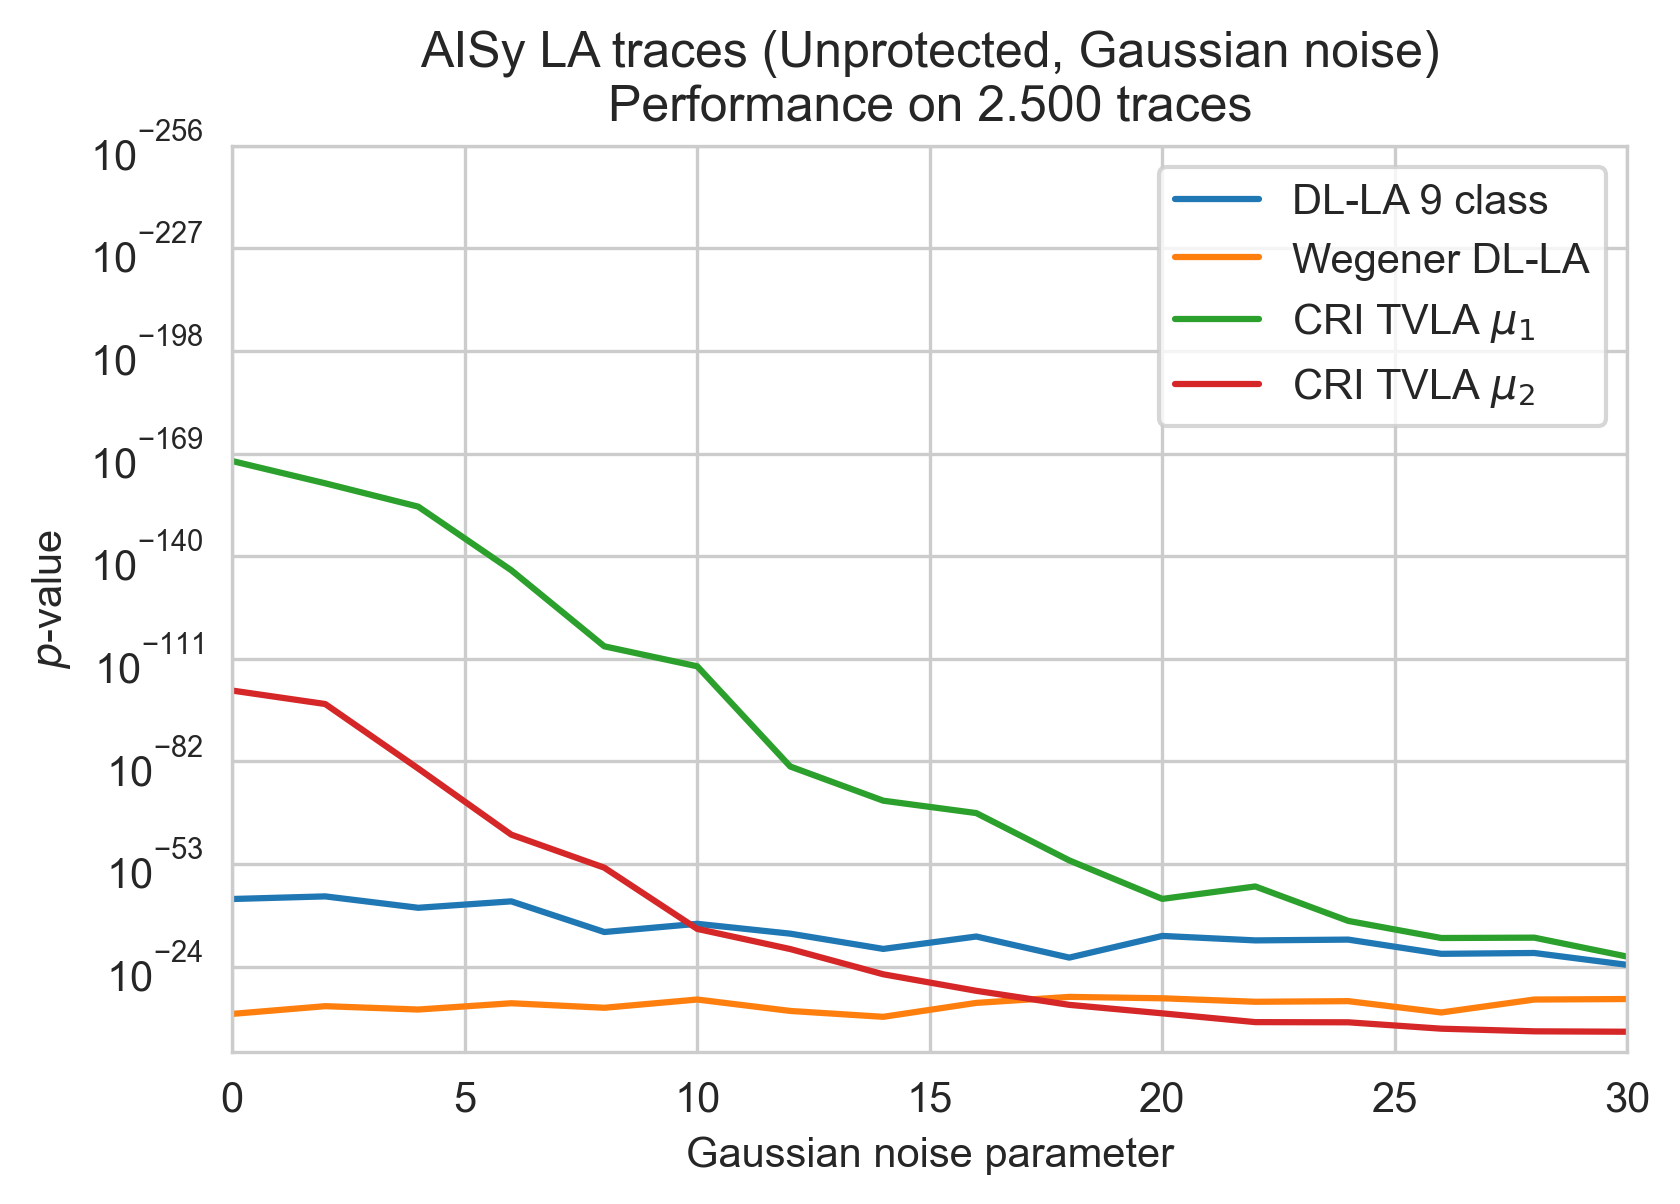

In [28]:
plot(Database.aisy, PollutionType.gauss, xlim=(0, 30))